In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import random

In [208]:
from tensorflow.keras.datasets import mnist

In [209]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [210]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [211]:
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 4))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 4))

In [212]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

In [213]:
from sklearn.model_selection import train_test_split

X_train, _,Y_train, _ = train_test_split(
    X_train, Y_train, train_size=500, stratify=Y_train, random_state=42
)

In [214]:
X_train = X_train/255.0
X_test = X_test/255.0

In [215]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

In [216]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [217]:
def manipulatingTheArray(mat):
    #mat = flattenInput(mat)
    
    for index in range(mat.shape[0]):    
        if mat[index] < 0.2:
            mat[index] = -1
    return mat

In [218]:
def Thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

In [219]:
def printResultForElementWise(inputImage,finalWeight):
    result = []
    finalWeight = finalWeight.reshape(784,1)
    for item in inputImage:
        item = flattenInput(item)
        #item = item.flatten()
        #item = manipulatingTheArray(item)
        result_ = finalWeight * item
#         print(item.shape)
#         print(finalWeight.shape)
#        result_ = np.dot(item.T,finalWeight)
        result.append(result_)
    return result

In [220]:
def weightUpdateElementWise(epochs,X_train,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    alpha = 0.01
    flattenImage = [] # empty list
    for image_ in X_train:
        image_ = flattenInput(image_)
        image_ = image_.flatten()
        flattenImage.append(image_)
    
    outEpoch = []
    alpha = 0.05
    for epoch in range(epochs):
        for input_ in flattenImage:
            out = np.multiply(input_,weight)
        
            #Normalize
            mean = np.mean(out)
            std_dev = np.std(out)
            out = (out - mean) / std_dev
        
            # Weight Update
            for index in range(len(out)):
                if out[index] > input_[index]:
                    weight[index] = weight[index] + alpha * input_[index]
                else:
                    weight[index] = weight[index] - alpha * input_[index]
                    
                if weight[index] < 0:
                    weight[index] = 0
    return weight

In [221]:
def multipleBlocks(epoch, inputImage, weight):
    flattenImage = []
    
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    
    index = 0
    blockSize = 28
    
    alpha = 0.3
    for epoch_ in range(epoch):
        random.shuffle(flattenImage)
        
        for input_ in flattenImage:
            startIndex = 0
            out = []
            while(startIndex < 784):
                image_ = input_[startIndex:startIndex + blockSize]
                weight_ = weight[startIndex : startIndex + blockSize]
                
                dotProduct =  np.dot(image_.T,weight_)
                out.append(dotProduct[0])
                startIndex += blockSize
                
            out = [float(num)/max(out) for num in out]
            
            # Weight Update
            start = 0
            for index in range(len(out)):
                outBlock = out[index]
                for pixelIndex in np.arange(start,start + blockSize):
                    if(input_[pixelIndex] >= outBlock):
                        weight[pixelIndex] -= alpha * (input_[pixelIndex] - outBlock)
                    else:
                        weight[pixelIndex] += alpha * (outBlock - input_[pixelIndex])
                start = start + blockSize
        print(f"Epoch : {epoch_} Completed")
    
    return weight

In [222]:
weight = np.random.rand(784)

In [223]:
weightMatrix = multipleBlocks(5, X_train, weight)

Epoch : 0 Completed
Epoch : 1 Completed
Epoch : 2 Completed
Epoch : 3 Completed
Epoch : 4 Completed


In [224]:
out = printResultForElementWise(X_train,weightMatrix)

In [228]:
x=out[70].reshape(28,28)

In [229]:
x

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

In [231]:
# Trim the weights

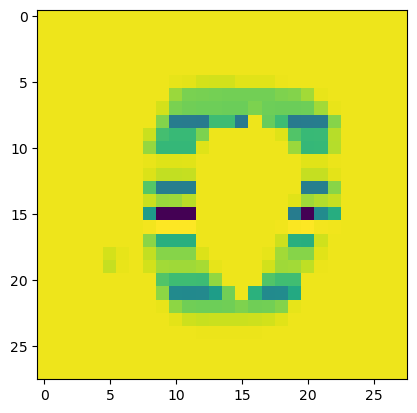

In [230]:
plt.imshow(x)